# Hand-Writing Recognition by CNNs 



In [ ]:
import os

import tensorflow as tf
import matplotlib.pyplot as plt

os.environ['OMP_NUM_THREADS'] = '1'
tf.__version__

'2.0.0'

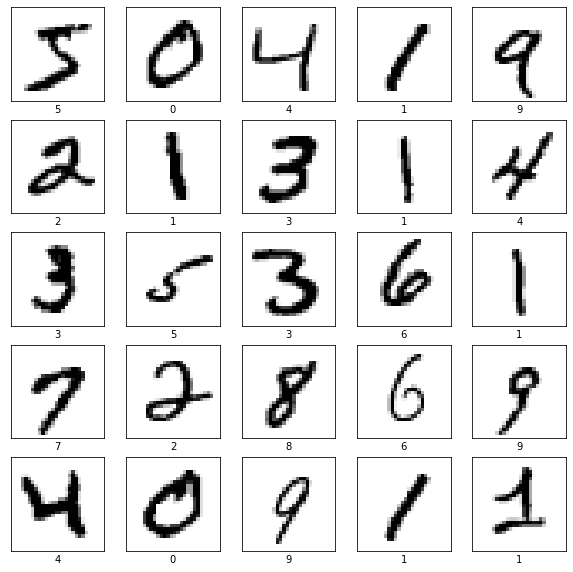

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [ ]:
class CustomizedCNN(tf.keras.models.Model):
    def __init__(self, *args, **kwargs):
      super(CustomizedCNN, self).__init__()
      self.conv2d = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), 
                                           strides= (1,1) ,activation='relu')
      self.max_pooling2d = tf.keras.layers.MaxPool2D((2, 2))
      self.conv2d_1 = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), 
                                             strides= (1,1) ,activation='relu')
      self.flatten = tf.keras.layers.Flatten()
      self.dropout = tf.keras.layers.Dropout(0.5)
      self.dense = tf.keras.layers.Dense(128, activation='relu')
      self.dropout_1 = tf.keras.layers.Dropout(0.5)
      self.dense_1 = tf.keras.layers.Dense(10,activation='relu')
    def call(self, inputs, training=None, mask=None):
      x = tf.reshape(inputs, [-1,28,28,1])
      x = self.conv2d(x)
      x = self.max_pooling2d(x)
      x = self.conv2d_1(x)
      x = self.flatten(x)
      x = self.dropout(x)
      x = self.dense(x)
      x = self.dropout_1(x)
      return self.dense_1(x)

        
        

In [ ]:
model = CustomizedCNN()
model.build(input_shape=(None, 28, 28))
model.summary()

Model: "customized_cnn_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            multiple                  320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  18496     
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  991360    
_________________________________________________________________
dropout_3 (Dropout)          multiple             

In [ ]:
model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

## Train and Evaluate the Model 


In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype ('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0
history = model.fit( train_images, train_labels, epochs= 10, batch_size= 32, 
                    validation_split = 0.1) 

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 95s 2ms/sample - loss: 0.2336 - accuracy: 0.9298 - val_loss: 0.0469 - val_accuracy: 0.9865
Epoch 2/10
54000/54000 [==============================] - 92s 2ms/sample - loss: 0.0921 - accuracy: 0.9735 - val_loss: 0.0372 - val_accuracy: 0.9888
Epoch 3/10
54000/54000 [==============================] - 94s 2ms/sample - loss: 0.0718 - accuracy: 0.9784 - val_loss: 0.0400 - val_accuracy: 0.9893
Epoch 4/10
54000/54000 [==============================] - 91s 2ms/sample - loss: 0.0598 - accuracy: 0.9821 - val_loss: 0.0360 - val_accuracy: 0.9892
Epoch 5/10
54000/54000 [==============================] - 93s 2ms/sample - loss: 0.0513 - accuracy: 0.9845 - val_loss: 0.0334 - val_accuracy: 0.9917
Epoch 6/10
54000/54000 [==============================] - 93s 2ms/sample - loss: 0.0448 - accuracy: 0.9861 - val_loss: 0.0337 - val_accuracy: 0.9915
Epoch 7/10
54000/54000 [==============================] -

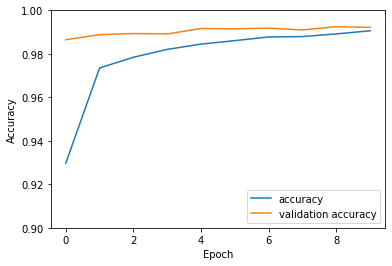

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.9926
